In [1]:
# aa_spectraltool
# 2019 francesco.anselmo@aaschool.ac.uk

In [2]:
%matplotlib inline

In [3]:
# import libraries
import colour
import colour.plotting
import colour.io
from colour.plotting import *
import PIL
import numpy as np
from numpy import array, zeros, linspace, float64, savetxt
from scipy import interpolate, vectorize
from scipy.signal import argrelextrema, argrelmax, savgol_filter, resample
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import pylab
#from itertools import izip
#from itertools import zip_longest
izip = zip
import csv
import warnings
warnings.filterwarnings("ignore")

In [4]:
img = PIL.Image.open("DSC_0069.JPG") # EDIT THIS: change name of your file

In [5]:
# show image format, size and colour mode
print(img.format, img.size, img.mode)

('JPEG', (3840, 2160), 'RGB')


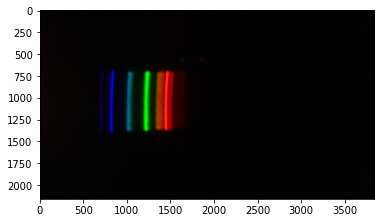

In [6]:
# show image - ensure that the image has the blue part of the spectrum on the left
# if not, rotate it with an image editing software, save it and import it again
plt.imshow(np.asarray(img))

In [7]:
# convert image to grey scale
greyscale_img = img.convert("LA")
print(greyscale_img.format, greyscale_img.size, greyscale_img.mode)

(None, (3840, 2160), 'LA')


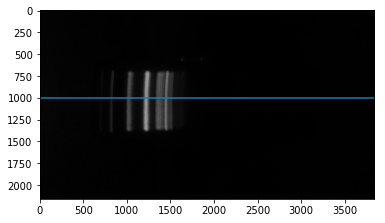

In [8]:
# show grey scale image
plt.imshow(greyscale_img)
# show sampling line
sampling_line = 1000 # EDIT THIS: change to the line you need to sample
plt.axhline(sampling_line) 

In [9]:
# load pixels into numpy array
pix = array(greyscale_img)

In [10]:
# sample at the specified pixel row / horizontal line
data_row = pix[sampling_line] 

3840


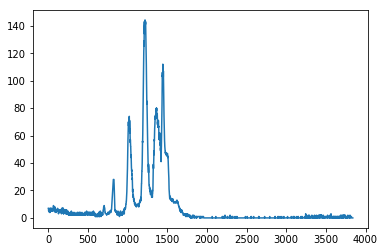

In [11]:
# take data in sampling line as an array of values - this is the raw spectral data
spectrum = np.take(data_row,0,1)
# print the number of values, which is equal to the image horizontal size
print(len(spectrum))
# plot the raw spectrum
plt.plot(spectrum)

In [29]:
# this is the calibration process: 
# using a compact fluorescent spectrum, choose how to trim the left and right edge of the data
# so that the second blue wavelength is 436 nm and the green wavelength is 546 nm
# this might need a little bit of trial and error and running iteratively this cell and
# the next two cells too

trimLeft = 610 # EDIT THIS: change this for calibration
trimRight = 1900 # EDIT THIS: change this for calibration

# create a linear integer space arrangement with x trimmed between the two selected values
x = np.linspace(trimLeft,trimRight,trimRight-trimLeft+1)

# smooth the spectrum using the Savitzky–Golay filter 
newSpectrum = savgol_filter(spectrum, 21, 2)

# normalise the spectrum so that the values are between 0 and 1
normalizedSpectrum = normalize(newSpectrum[trimLeft:trimRight+1].reshape(1,-1),'max').reshape(-1,1)

# resample the spectrum so that the sampling is every nanometer
resampledSpectrum = resample(normalizedSpectrum,730-380+1).flatten("C")
#print(resampledSpectrum)

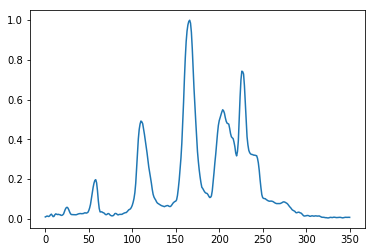

In [30]:
# plot the resampled and smoothed spectrum
plt.plot(resampledSpectrum)

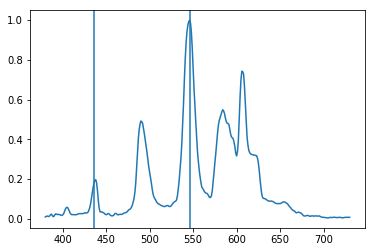

In [31]:
# create a linear integer space arrangement with x between 380 and 730 nm
xx = np.linspace(380,730,730-380+1)

# plot the new resampled, smoothed spectrum, transposed between 380 and 730 nm
plt.plot(xx,resampledSpectrum) 

# plot the second blue wavelength (436 nm) and the green wavelength (546 nm)
plt.axvline(x=436)
plt.axvline(x=546)

# if the blue lines are marking the second blue wavelength and the green wavelength, 
# proceed to the next cell, otherwise revise the trimLeft and trimRight values and run
# another iteration

In [34]:
# transform the spectrum into a dictionary that the Colour library can process
spd_data = dict(izip(xx, resampledSpectrum))
#print(spd_data)

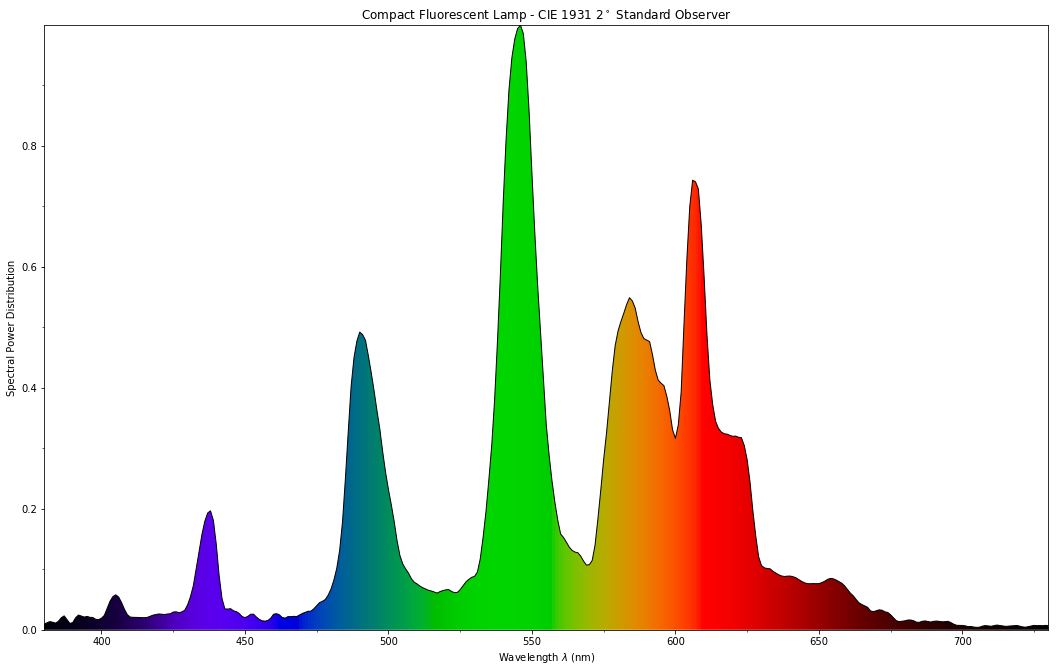

In [35]:
# EDIT THIS: change name according to name of spectrum
spd = colour.SpectralPowerDistribution(spd_data, name='Compact Fluorescent Lamp')
#print(spd)
# plot the spectrum using the Colour library
single_spd_plot(spd)

In [36]:
# calculate the sample spectral power distribution *CIE XYZ* tristimulus values 
# using the CIE 1931 2 degree standard observer and D65 (daylight) standard illuminant
cmfs = colour.STANDARD_OBSERVERS_CMFS['CIE 1931 2 Degree Standard Observer']
illuminant = colour.ILLUMINANTS_RELATIVE_SPDS['D65']
XYZ = colour.spectral_to_XYZ(spd, cmfs, illuminant)
print(XYZ)

[28.50230347 33.17148394  8.18436548]


In [37]:
# calculate *xy* chromaticity coordinates for the spectrum
xy =  colour.XYZ_to_xy(XYZ)
print(xy)

[0.40800253 0.47484055]


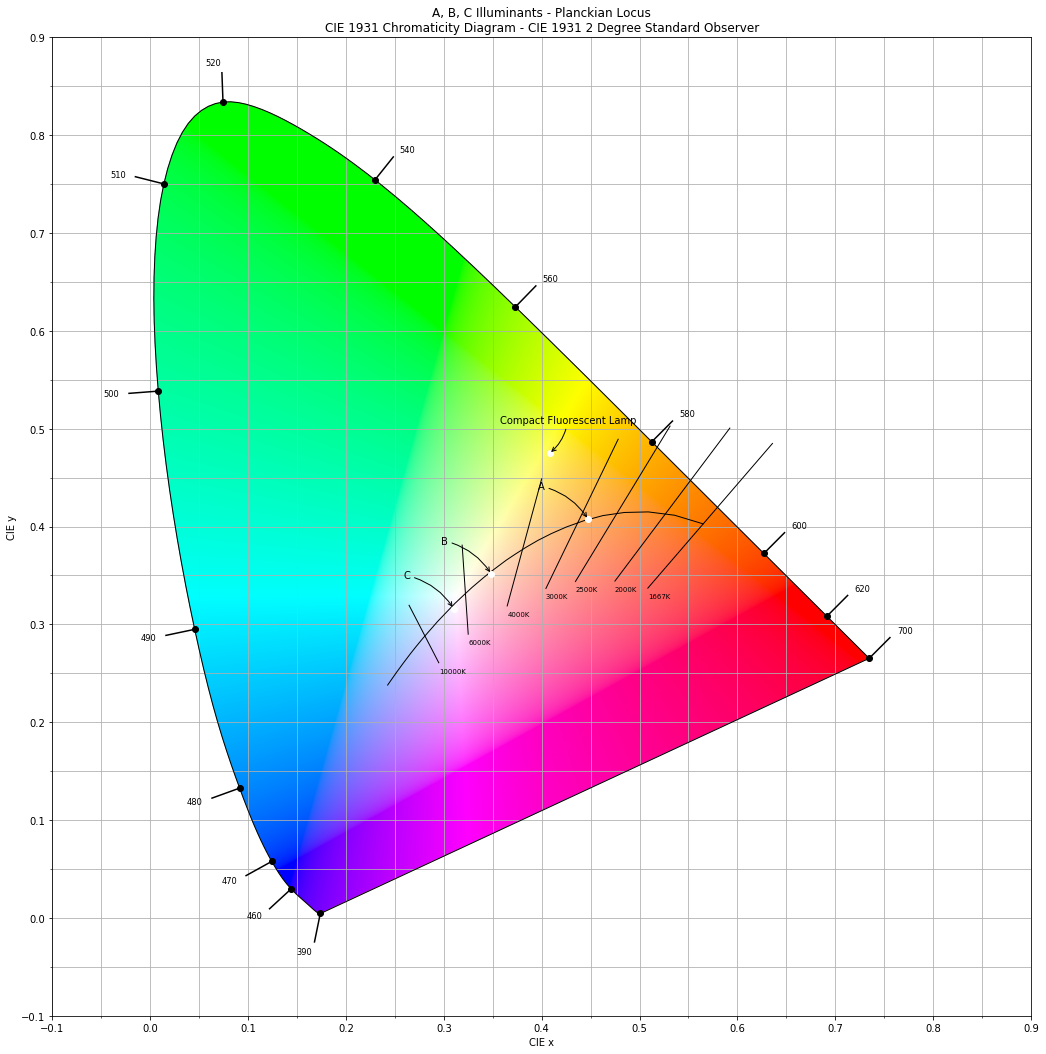

In [40]:
# display the colour coordinate of the spectral sample in the CIE chromaticity diagram

# plot the *CIE 1931 Chromaticity Diagram* including the Planckian Locus
# the argument *standalone=False* is passed so that the plot doesn't get displayed
# and can be used as a basis for other plots
#print(dir(colour.plotting))
#CIE_1931_chromaticity_diagram_plot(standalone=False)
#planckian_locus_CIE_1931_chromaticity_diagram_plot(standalone=False)
colour.plotting.planckian_locus_chromaticity_diagram_plot_CIE1931(standalone=False)

# plot the *xy* chromaticity coordinates of the spectrum
x, y = xy
pylab.plot(x, y, 'o-', color='white')

# Annotating the plot.
pylab.annotate(spd.name.title(),
               xy=xy,
               xytext=(-50, 30),
               textcoords='offset points',
               arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=-0.2'))

# Displaying the plot.
display(standalone=True)

In [41]:
# show the spectrum wavelengths
print(spd.wavelengths)

[380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390. 391. 392. 393.
 394. 395. 396. 397. 398. 399. 400. 401. 402. 403. 404. 405. 406. 407.
 408. 409. 410. 411. 412. 413. 414. 415. 416. 417. 418. 419. 420. 421.
 422. 423. 424. 425. 426. 427. 428. 429. 430. 431. 432. 433. 434. 435.
 436. 437. 438. 439. 440. 441. 442. 443. 444. 445. 446. 447. 448. 449.
 450. 451. 452. 453. 454. 455. 456. 457. 458. 459. 460. 461. 462. 463.
 464. 465. 466. 467. 468. 469. 470. 471. 472. 473. 474. 475. 476. 477.
 478. 479. 480. 481. 482. 483. 484. 485. 486. 487. 488. 489. 490. 491.
 492. 493. 494. 495. 496. 497. 498. 499. 500. 501. 502. 503. 504. 505.
 506. 507. 508. 509. 510. 511. 512. 513. 514. 515. 516. 517. 518. 519.
 520. 521. 522. 523. 524. 525. 526. 527. 528. 529. 530. 531. 532. 533.
 534. 535. 536. 537. 538. 539. 540. 541. 542. 543. 544. 545. 546. 547.
 548. 549. 550. 551. 552. 553. 554. 555. 556. 557. 558. 559. 560. 561.
 562. 563. 564. 565. 566. 567. 568. 569. 570. 571. 572. 573. 574. 575.
 576. 

In [42]:
# show the spectrum values
print(spd.values)

[0.00904005 0.01157978 0.01352834 0.01256973 0.01101839 0.01408931
 0.01994552 0.02298258 0.01676157 0.0105256  0.01195072 0.01996405
 0.02437957 0.02266917 0.02102798 0.02206784 0.02063032 0.02036494
 0.01727718 0.0168123  0.0191895  0.02385412 0.03549111 0.04730937
 0.05497085 0.05778096 0.05405549 0.0449828  0.0340789  0.02505689
 0.0210899  0.0205991  0.02050458 0.02022544 0.02009812 0.01998363
 0.02055329 0.02248012 0.02427587 0.02528687 0.02617557 0.02575258
 0.02521432 0.02611722 0.0264518  0.0293008  0.02976712 0.02814526
 0.02960591 0.03219123 0.0410434  0.05441195 0.07261852 0.10031513
 0.12871546 0.15734364 0.1790865  0.19290755 0.19656085 0.18075053
 0.14147536 0.08969893 0.05181026 0.03451562 0.03421966 0.03489041
 0.03136897 0.03006918 0.02693149 0.02194543 0.0200715  0.02220749
 0.02567825 0.02581828 0.02099308 0.01716794 0.01485855 0.01433561
 0.01538853 0.01925796 0.0257776  0.0266545  0.02474108 0.02028489
 0.01936434 0.02177538 0.0216779  0.02226811 0.02179929 0.0244

In [43]:
# export the spectral dataset to a csv file
# EDIT THIS: change filename of the csv file (csv means comma separated values)
out = csv.writer(open("compact_fluorescent.csv","w"), delimiter=',',quoting=csv.QUOTE_ALL) 
out.writerow(spd.wavelengths[0::5])
out.writerow(spd.values[0::5])

In [44]:
# well done! now do the same with other spectral pictures!

In [45]:
spd.wavelengths[0::5]

array([380., 385., 390., 395., 400., 405., 410., 415., 420., 425., 430.,
       435., 440., 445., 450., 455., 460., 465., 470., 475., 480., 485.,
       490., 495., 500., 505., 510., 515., 520., 525., 530., 535., 540.,
       545., 550., 555., 560., 565., 570., 575., 580., 585., 590., 595.,
       600., 605., 610., 615., 620., 625., 630., 635., 640., 645., 650.,
       655., 660., 665., 670., 675., 680., 685., 690., 695., 700., 705.,
       710., 715., 720., 725., 730.])

In [46]:
spd.values[0::5]

array([0.00904005, 0.01408931, 0.01195072, 0.02206784, 0.0191895 ,
       0.05778096, 0.0210899 , 0.01998363, 0.02617557, 0.0293008 ,
       0.0410434 , 0.15734364, 0.14147536, 0.03489041, 0.0200715 ,
       0.01716794, 0.0257776 , 0.02177538, 0.02700008, 0.03972683,
       0.06745889, 0.24954003, 0.49175754, 0.39473723, 0.23172429,
       0.10878068, 0.07568241, 0.06403054, 0.06600909, 0.06631586,
       0.08826469, 0.24823097, 0.70689534, 0.99293646, 0.7540396 ,
       0.33855239, 0.15830494, 0.12838202, 0.10751075, 0.2817155 ,
       0.49342231, 0.54321897, 0.47852686, 0.40738474, 0.31629555,
       0.69912709, 0.58321875, 0.33278861, 0.31955701, 0.2809423 ,
       0.10610831, 0.09363321, 0.08873653, 0.07762875, 0.07629436,
       0.08425887, 0.06640346, 0.0417254 , 0.03148555, 0.02477654,
       0.01487795, 0.0123359 , 0.01403536, 0.01399853, 0.00714837,
       0.0040718 , 0.00582531, 0.00566443, 0.00605065, 0.0072619 ,
       0.0068744 ])